# Trabalho CE2 - Eredivisie vs Primeira Liga

Professor Eduardo Monteiro

Matheus Erbisti - 180024990

Ramon Moreira - 180036980

## Introdução

### Importação de Pacotes e Dados

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings

holandes = pd.read_csv("Holandes.csv")
portugues = pd.read_csv("Portugues.csv")

warnings.filterwarnings("ignore")

## Análise Descritiva

### Gols por jogo

Essa variável é possivelmente a mais importante de todo o banco de dados. Afinal, o gol é o ápice do jogo de futebol, e é o que torna o jogo emocionante, seja pela dificuldade, quantidade ou falta dos gols.

Dessa forma, podemos enxergar os dados de gols por jogo da seguinte maneira:

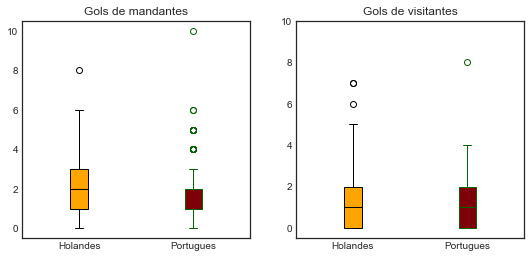

In [93]:
plt.style.use('seaborn-white')

gols_dentro = [holandes.FTHG, portugues.FTHG]
gols_fora = [holandes.FTAG, portugues.FTAG]
cores = ["orange", "black"]
legendas = ["Holandês", "Português"]

fig, (graf1, graf2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4))

for i in range(2):
    graf1.boxplot(gols_dentro[i], patch_artist = True, positions = [i + 1], 
                               boxprops = dict(facecolor = cores[i], color = cores[i + 1]),
                               capprops = dict(color = cores[i + 1]),
                               whiskerprops = dict(color = cores[i + 1]),
                               flierprops = dict(color = cores[i + 1], markeredgecolor = cores[i + 1]),
                               medianprops = dict(color = cores[i + 1]))
    
    graf2.boxplot(gols_fora[i], patch_artist = True, positions = [i + 1], 
                               boxprops = dict(facecolor = cores[i], color = cores[i + 1]),
                               capprops = dict(color = cores[i + 1]),
                               whiskerprops = dict(color = cores[i + 1]),
                               flierprops = dict(color = cores[i + 1], markeredgecolor = cores[i + 1]),
                               medianprops = dict(color = cores[i + 1]))
    if i == 0:
        cores[1] = "#7E0008"
        cores.append("#006400")

graf1.set_title('Gols de mandantes')
graf2.set_title('Gols de visitantes')
graf1.set_xticklabels(['Holandes', 'Portugues'])
graf2.set_xticklabels(['Holandes', 'Portugues'])
plt.ylim(-0.5, 10)

plt.show()

In [36]:
gols = {'holandes_casa':holandes.FTHG, 'portugues_casa':portugues.FTHG,
        'holandes_fora':holandes.FTAG, 'portugues_fora':portugues.FTAG}

FTHG = pd.DataFrame(data = gols)

FTHG.describe()

,holandes_casa,portugues_casa,holandes_fora,portugues_fora
count,306.000000,306.000000,306.000000,306.000000
mean,2.006536,1.522876,1.460784,1.176471
std,1.584750,1.412288,1.416564,1.168536
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000
75%,3.000000,2.000000,2.000000,2.000000
max,8.000000,10.000000,7.000000,8.000000


Com esses gráficos e as medidas, podemos perceber diversos pontos:

1 - Em ambos os campeonatos, o time que joga em casa costuma marcar mais gols. Isso é evidenciado pelo 1º quartil que é de 1 gol nos mandantes dos dois campeonatos, e 0 gols para os visitantes.

2 - O campeonato holandês teve média superior de gols tanto para quem joga em casa e quem joga fora, embora o português tenha bem mais valores extremos.

3 - De maneira geral, os times holandeses que jogam em casa fazem mais gols, como evidenciado por todos os quartis e média.

4 - Os desvios padrões são bem próximos uns dos outros, com exceção dos times visitantes de Portugal que tende a ser mais consistente com a média que os demais.

### Chutes na partida

Outra variável importante, pois se não há chutes, não há gols. De maneira simplista, a quantidade de chutes  mede o quão "agitada" e pró-ofensiva a partida foi; então, a tendência é que um jogo seja melhor quanto maior for o número de chutes.

Portanto, vamos observar os dados:

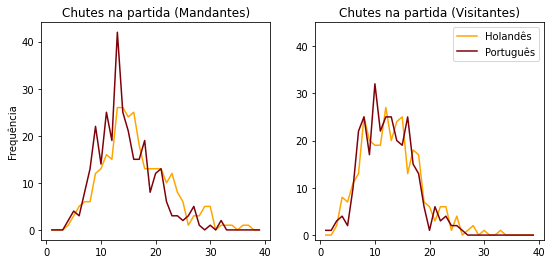

In [4]:
campeonatos = [holandes, portugues]
cores = ["orange", "#7E0008"]
legenda = ["Holandês", "Português"]

fig, (graf1, graf2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4))

for i in range(len(campeonatos)):
    counts1, bins1 = np.histogram(campeonatos[i].HS, bins = range(0, 40, 1))
    counts2, bins2 = np.histogram(campeonatos[i].AS, bins = range(0, 40, 1))
    
    graf1.plot(bins1[:-1] + 1, counts1, color = cores[i], label = legenda[i])
    graf1.set_ylabel('Frequência')
    graf1.set_title('Chutes na partida (Mandantes)')
    
    graf2.plot(bins2[:-1] + 1, counts2, color = cores[i], label = legenda[i])
    graf2.set_title('Chutes na partida (Visitantes)')
    

plt.ylim(-1, 45)
plt.legend()

plt.show()

In [98]:
cht = {"chutes_mandante_holanda":holandes.HS, "chutes_mandante_portugal":portugues.HS,
         "chutes_visitante_holanda":holandes.AS, "chutes_visitante_portugal":portugues.AS}

chutes = pd.DataFrame(data = cht)

chutes.describe()

,chutes_mandante_holanda,chutes_mandante_portugal,chutes_visitante_holanda,chutes_visitante_portugal
count,306.000000,306.000000,306.000000,306.000000
mean,15.375817,13.437908,12.006536,11.379085
std,6.002126,5.111645,5.226661,4.565022
min,3.000000,3.000000,2.000000,0.000000
25%,11.250000,10.000000,8.000000,8.000000
50%,14.500000,13.000000,12.000000,11.000000
75%,19.000000,17.000000,15.000000,15.000000
max,36.000000,31.000000,32.000000,25.000000


Diversas características dos dados puderam ser levantadas com base nesses recursos:
    
1 - Em ambos os campeonatos, os mandantes tendem a chutarem mais que os visitantes, como evidenciado pela média e os quartis. Entretanto, o desvio padrão também é maior, ou seja, é uma média menos consistente do que dos visitantes.

2 - Os times holandeses costumam ter mais chutes por partida que os portugueses, tendo mais times que chutaram entre 18 a 40 vezes em partidas. Ainda assim, o menor desvio padrão dos clubes da Holanda é dos visitantes, que consegue ser maior do que o desvio padrão dos clubes portugueses que jogam em casa.

3 - O maior valor de chutes numa partida em Portugal é de 31 em um time mandante, que é um valor inferior ao maior número de chutes de um clube visitante holandês com 32.

### Precisão dos chutes na partida

Embora o número de chutes possa refletir bem a qualidade de uma partida, não é exatamente uma regra fixa; pode acontecer uma partida com 4 chutes e 4 gols, bem como uma partida com 30 chutes isolados.

Seguindo essa lógica, os chutes com risco de gol são aqueles que transmitem emoção. Então, criamos uma nova variável "Precisão" para medir quantos chutes são direcionados ao gol em relação ao total. Portanto:

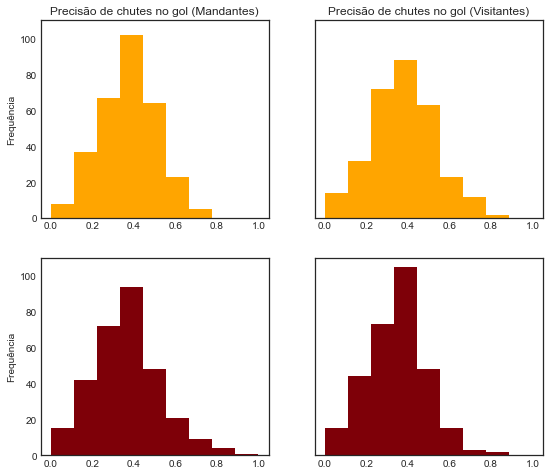

In [94]:
precisao_holandes_casa = []
precisao_portugues_casa = []

precisao_holandes_fora = []
precisao_portugues_fora = []


for i in range(len(holandes)):
    precisao_casa_hd = holandes.HST[i] / holandes.HS[i]
    precisao_casa_pt = portugues.HST[i] / portugues.HS[i]
    
    precisao_fora_hd = holandes.AST[i] / holandes.AS[i]
    precisao_fora_pt = portugues.AST[i] / portugues.AS[i]
    
    
    precisao_holandes_casa.append(precisao_casa_hd)
    precisao_portugues_casa.append(precisao_casa_pt)
    
    precisao_holandes_fora.append(precisao_fora_hd)
    precisao_portugues_fora.append(precisao_fora_pt)

    
    
precisoes_casa = [precisao_holandes_casa, precisao_portugues_casa]
precisoes_fora = [precisao_holandes_fora, precisao_portugues_fora]



fig, grafs = plt.subplots(nrows = 2, ncols = 2, figsize = (9, 8), sharey = True)

bins = np.linspace(0, 1, 10)


grafs[0, 0].hist(precisao_holandes_casa, bins, rwidth = 1, color = "orange")
grafs[0, 1].hist(precisao_holandes_fora, bins, rwidth = 1, color = "orange")
grafs[1, 0].hist(precisao_portugues_casa, bins, rwidth = 1, color = "#7E0008")
grafs[1, 1].hist(precisao_portugues_fora, bins, rwidth = 1, color = "#7E0008")

grafs[0, 0].set_title("Precisão de chutes no gol (Mandantes)")
grafs[0, 1].set_title("Precisão de chutes no gol (Visitantes)")

grafs[0, 0].set_ylabel("Frequência")
grafs[1, 0].set_ylabel("Frequência")

plt.show()

In [99]:
pcs = {"precisao_mandante_holanda":precisao_holandes_casa, "precisao_visitante_holanda":precisao_holandes_fora,
       "precisao_mandante_portugal":precisao_portugues_casa, "precisao_visitante_portugal":precisao_portugues_fora}

precisao = pd.DataFrame(data = pcs)

precisao.describe()

,precisao_mandante_holanda,precisao_visitante_holanda,precisao_mandante_portugal,precisao_visitante_portugal
count,306.000000,306.000000,306.000000,305.000000
mean,0.366567,0.368974,0.358170,0.333777
std,0.138417,0.157187,0.162449,0.142256
min,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.264035,0.250000,0.250000
50%,0.363636,0.363636,0.333333,0.333333
75%,0.466667,0.500000,0.453409,0.428571
max,0.714286,0.800000,1.000000,0.833333


Dado a análise exploratória desses dados, vemos que:

1 - A precisão dos times não parece ser muito afetada por jogar dentro ou fora de casa. Isso é evidenciado tanto pela médias, desvios padrões, quantis e gráficos dos mandantes e visitantes da mesma liga.

2 - A distribuição dos dados aparenta não ser muito diferente em ambas as ligas, com todas as médias e medianas sendo bem próximas entre si, entre 33 a 37% de precisão. 

### Resultado da partida

Uma maneira comum de medir o quão boa foi uma partida, é pela previsibilidade do seu resultado; afinal, se existe alguma tendência forte para algum lado ganhar, o jogo tende a ser menos emocionante.

Pensando assim, montamos os seguintes gráficos para verificar as porcentagens de vitória para mandantes, visitantes ou empates:

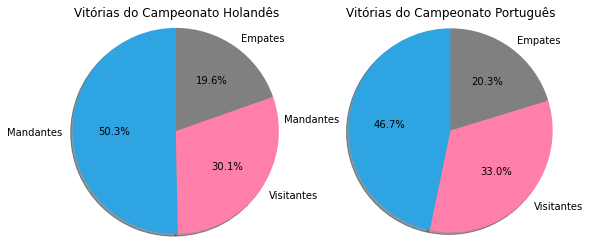

In [77]:
resultados_holandes = [sum(holandes.FTR == "H"), sum(holandes.FTR == "A"), sum(holandes.FTR == "D")]
resultados_portugues = [sum(portugues.FTR == "H"), sum(portugues.FTR == "A"), sum(portugues.FTR == "D")]
legenda = ["Mandantes", "Visitantes", "Empates"]
cores = ["#2FA4E2", "#FF7FAB", "gray"]

fig, (graf1, graf2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4))

graf1.pie(resultados_holandes, autopct='%1.1f%%', labels = legenda, shadow = True, startangle = 90, colors = cores)
graf2.pie(resultados_portugues, autopct='%1.1f%%', labels = legenda, shadow = True, startangle = 90, colors = cores)

graf1.axis('equal')
graf2.axis('equal')

graf1.set_title("Vitórias do Campeonato Holandês")
graf2.set_title("Vitórias do Campeonato Português")


plt.show()

Com os gráficos acima, vemos que ambos os campeonatos tem estruturas bem parecidas, em que o time que joga em casa é quem tem maiores chances de ganhar, seguido pela vitória dos visitantes e por fim os empates.

Contudo, o mais interessante seria que o campeonato fosse equiprovável para qualquer resultado, pois tornaria o campeonato mais imprevisível e emocionante. Nesse sentido, a Primeira Liga é quem parece mais balanceado, pois é menos orientado pra vitória dos times da casa do que a Eredivisie.

### Empates com gols

O resultado final de uma partida deveria refletir o quão agitada e emocionante ela foi; contudo, nem sempre o futebol não segue essas regras. 

De maneira geral, há uma grande diferença entre um jogo terminar 0 a 0 e terminar num 3 a 3, ainda que ambos sejam empates e que  existam defensores de "um bom 0 a 0". 

Nesse raciocínio, criamos essa nova variável que mostra quantos empates que foram marcados pelo menos 1 gol para cada lado, e quantos acabaram sem gols. Sendo assim:

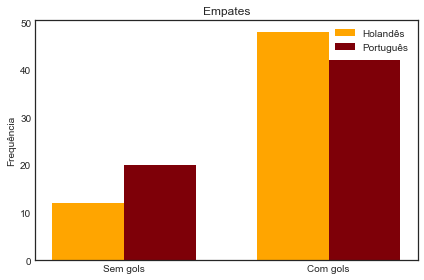

In [155]:
empates_hd = holandes[holandes.FTHG == holandes.FTAG]
empates_pt = portugues[portugues.FTHG == portugues.FTAG]

empates_hd.reset_index(inplace = True, drop = True)
empates_pt.reset_index(inplace = True, drop = True)

com_gols_hd = 0
com_gols_pt = 0


for jogo in range(len(empates_hd)):
    if empates_hd.FTHG[jogo] != 0:
        com_gols_hd += 1



for jogo in range(len(empates_pt)):
    if empates_pt.FTHG[jogo] != 0:
        com_gols_pt += 1

legenda = ['Sem gols', 'Com gols']
hd = [len(empates_hd) - com_gols_hd, com_gols_hd]
pt = [len(empates_pt) - com_gols_pt, com_gols_pt]

x = np.arange(len(legenda))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hd, width, label = 'Holandês', color = "orange")
rects2 = ax.bar(x + width/2, pt, width, label = 'Português', color = "#7E0008")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequência')
ax.set_title('Empates')
ax.set_xticks(x)
ax.set_xticklabels(legenda)
ax.legend()

fig.tight_layout()

plt.show()

In [160]:
empt = {'holandes_empates':empates_hd.FTHG, 'portugues_empates':empates_pt.FTHG}

empates = pd.DataFrame(data = empt)

empates.describe()

,holandes_empates,portugues_empates
count,60.000000,62.000000
mean,1.266667,1.032258
std,0.989207,0.974557
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,1.750000
max,4.000000,4.000000


Podemos perceber as seguintes curiosidades:

1 - O número total de empates em ambas as ligas foi bem próximo, bem como o desvio padrão e o empate com maior número de gols.

2 - Como demonstrado pelo gráfico, média e 1º quartil, o campeonato holandês tem proporcionalmente bem mais empates com gols do que os times portugueses. Esse é um indício de que a Eredivisie seja mais competitiva e emocionante que a Primeira Liga.